In [1]:
import os
import torch
from ultralytics import YOLO

def train_yolov11(
		data_yaml,
		weights='yolo11n.pt',
		img_size=640,
		batch_size=16,
		epochs=50,
		device='0'
):
	"""
	Function to train YOLOv11 with a specified dataset.

	Parameters:
	- data_yaml: Path to the data.yaml file (specifying paths to train/val and class info)
	- weights: Path to the pretrained weights (default: yolov11s.pt)
	- img_size: Image size (default: 640)
	- batch_size: Batch size (default: 16)
	- epochs: Number of epochs for training (default: 100)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""
	print(f"Starting YOLOv11 training with {epochs} epochs on device {device}")
	model = YOLO(weights).to(device)
	model.train(
		data=data_yaml,
		imgsz=img_size,
		epochs=epochs,
		device=device
	)
	model.save('yolo11n_finetuned.pt')
	print("Training Complete.")

def run_inference(weights_path, source, img_size=640, conf_thresh=0.25, device='0'):
	"""
	Function to run inference using the trained YOLOv11 model.

	Parameters:
	- weights_path: Path to the trained weights
	- source: Directory or image path to run inference on
	- img_size: Image size for inference (default: 640)
	- conf_thresh: Confidence threshold (default: 0.25)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""
	print(f"Running inference on images in {source}")
	model = YOLO(weights_path).to(device)
	image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
	image_paths = [os.path.join(source, filename) for filename in image_filenames]
	results = [model(img_path, imgsz=img_size) for img_path in image_paths]
	print("Inference Complete.")
	return results

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

data_yaml = 'Dataset/data.yaml'
pretrained_weights = 'yolo11n.pt'
test_images_dir = 'Dataset/images/test'

Using device: cuda


In [28]:
# train_yolov11(data_yaml, weights=pretrained_weights, device=device, epochs=50)

Starting YOLOv11 training with 50 epochs on device cuda
Ultralytics 8.3.5 🚀 Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4039MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/media/eric/D/repos/ANPR-GIA/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

train: Scanning /media/eric/D/repos/ANPR-GIA/Dataset/labels/train.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]
val: Scanning /media/eric/D/repos/ANPR-GIA/Dataset/labels/val.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G      1.762      4.407      1.613         16        640: 100%|██████████| 16/16 [00:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         24         24    0.00333          1      0.783      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.65G      1.381      2.638      1.196         20        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         24         24    0.00319      0.958      0.586      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.65G      1.315      2.304      1.162         13        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         24         24    0.00333          1      0.486      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.65G      1.404      2.302      1.223         16        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         24         24      0.559      0.583      0.612      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.66G      1.346      2.078      1.218         21        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         24         24          1      0.182      0.679      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.67G      1.299       1.85      1.231         15        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         24         24       0.68      0.355      0.517      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      1.344      1.739      1.263         17        640: 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         24         24      0.723      0.792      0.841      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.66G      1.354      1.739      1.231         16        640: 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         24         24        0.8      0.835      0.888      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.66G      1.271      1.621      1.207          7        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         24         24      0.901      0.875      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.66G      1.301      1.465      1.185         18        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         24         24      0.916      0.912      0.965      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.67G      1.255      1.451      1.196          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         24         24      0.987      0.542      0.665      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.66G      1.265      1.431      1.173         11        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         24         24      0.782      0.449      0.452      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.66G       1.17      1.274       1.14         14        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         24         24          1      0.747      0.796      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.67G      1.205      1.222      1.145         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         24         24          1      0.862      0.956      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.66G       1.13      1.158      1.141         14        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         24         24      0.914      0.958      0.973      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.67G      1.161      1.161      1.164         10        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         24         24      0.884          1      0.973      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.66G      1.226      1.149       1.16         19        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         24         24      0.872          1      0.952      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.66G      1.095      1.062      1.103         15        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         24         24      0.955          1       0.96      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.66G      1.096     0.9681      1.107         19        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         24         24      0.989      0.917       0.99       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.66G      1.078     0.9646      1.114         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         24         24      0.988      0.958      0.988      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.67G      1.125     0.9712       1.14         13        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         24         24      0.992      0.917      0.981      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.66G      1.073     0.9504      1.111         10        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         24         24      0.908      0.958      0.978      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.66G      1.091     0.9471      1.123          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         24         24      0.947      0.875      0.969      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.66G      1.075     0.8949      1.098         21        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         24         24          1      0.917      0.982      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.66G       1.02     0.8552      1.072         23        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         24         24       0.99      0.917      0.986      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.66G      0.939     0.7843      1.027         10        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         24         24      0.959      0.974      0.993      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.67G     0.9911     0.8119      1.065         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         24         24      0.992          1      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.66G     0.9912     0.8248      1.057         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         24         24       0.96      0.988      0.989      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.66G     0.9974     0.7998      1.037         15        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         24         24          1      0.994      0.995       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.66G     0.9638      0.742      1.031         23        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         24         24      0.968      0.958      0.993      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.66G     0.9612     0.7772      1.041          8        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         24         24      0.989      0.958      0.993       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.66G     0.9671     0.7534      1.049         15        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         24         24      0.996          1      0.995      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.66G      0.991     0.7668      1.055         17        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         24         24          1      0.985      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.66G     0.8879     0.7167          1         22        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         24         24      0.956          1      0.989      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.66G     0.8447     0.6513     0.9949         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         24         24      0.985          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.67G     0.8883     0.7083      1.036         12        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         24         24      0.994          1      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.66G     0.8877     0.7245      1.035         13        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         24         24      0.995          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G     0.8344     0.6597     0.9955          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         24         24      0.988          1      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.67G     0.8825     0.6839     0.9992         15        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         24         24      0.955          1      0.995      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.66G     0.8967     0.6843      1.008          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         24         24      0.956          1       0.99      0.753


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.66G     0.7954     0.6191     0.9705          9        640: 100%|██████████| 16/16 [00:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         24         24      0.957          1      0.982      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.66G     0.7573     0.5937     0.9457          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         24         24      0.956          1      0.977      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.66G     0.7194     0.5669     0.9376          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         24         24      0.954          1       0.98       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.66G     0.7171     0.5679     0.9546          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         24         24      0.954          1      0.982      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.66G     0.6896      0.527      0.911          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         24         24      0.954          1      0.992      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.66G     0.6944     0.5353     0.9311          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         24         24      0.955          1      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.66G     0.6519     0.5188      0.905          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         24         24      0.956          1      0.993      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.66G      0.659     0.5185      0.941          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         24         24      0.955          1      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.66G     0.6592     0.5163     0.9307          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         24         24      0.956          1      0.993      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.66G     0.6639      0.502     0.9262          9        640: 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         24         24      0.956          1      0.992      0.785



50 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4039MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


                   all         24         24      0.956          1      0.977      0.802
Speed: 0.3ms preprocess, 8.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2
Training Complete.


In [2]:
results = run_inference('yolo11n_finetuned.pt', test_images_dir, device=device)

Running inference on images in /media/eric/D/repos/ANPR-GIA/Dataset/images/test

image 1/1 /media/eric/D/repos/ANPR-GIA/Dataset/images/test/0192DSP_jpg.rf.6cf74c08f2d642a556ac4767330623a4.jpg: 640x640 1 license_plate, 11.5ms
Speed: 3.8ms preprocess, 11.5ms inference, 199.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/Dataset/images/test/0226MPP_jpg.rf.082b32b55c9501594c4c9b56311e7c83.jpg: 640x640 1 license_plate, 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/Dataset/images/test/1612MHX_jpg.rf.b3c65d5a38a3ae5919140c9fd8c03c22.jpg: 640x640 1 license_plate, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/Dataset/images/test/1855MHN_jpg.rf.9487d693ba848b337a744cb132985842.jpg: 640x640 1 license_plate, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 1.4m

In [20]:
results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()

[294, 236, 386, 356]

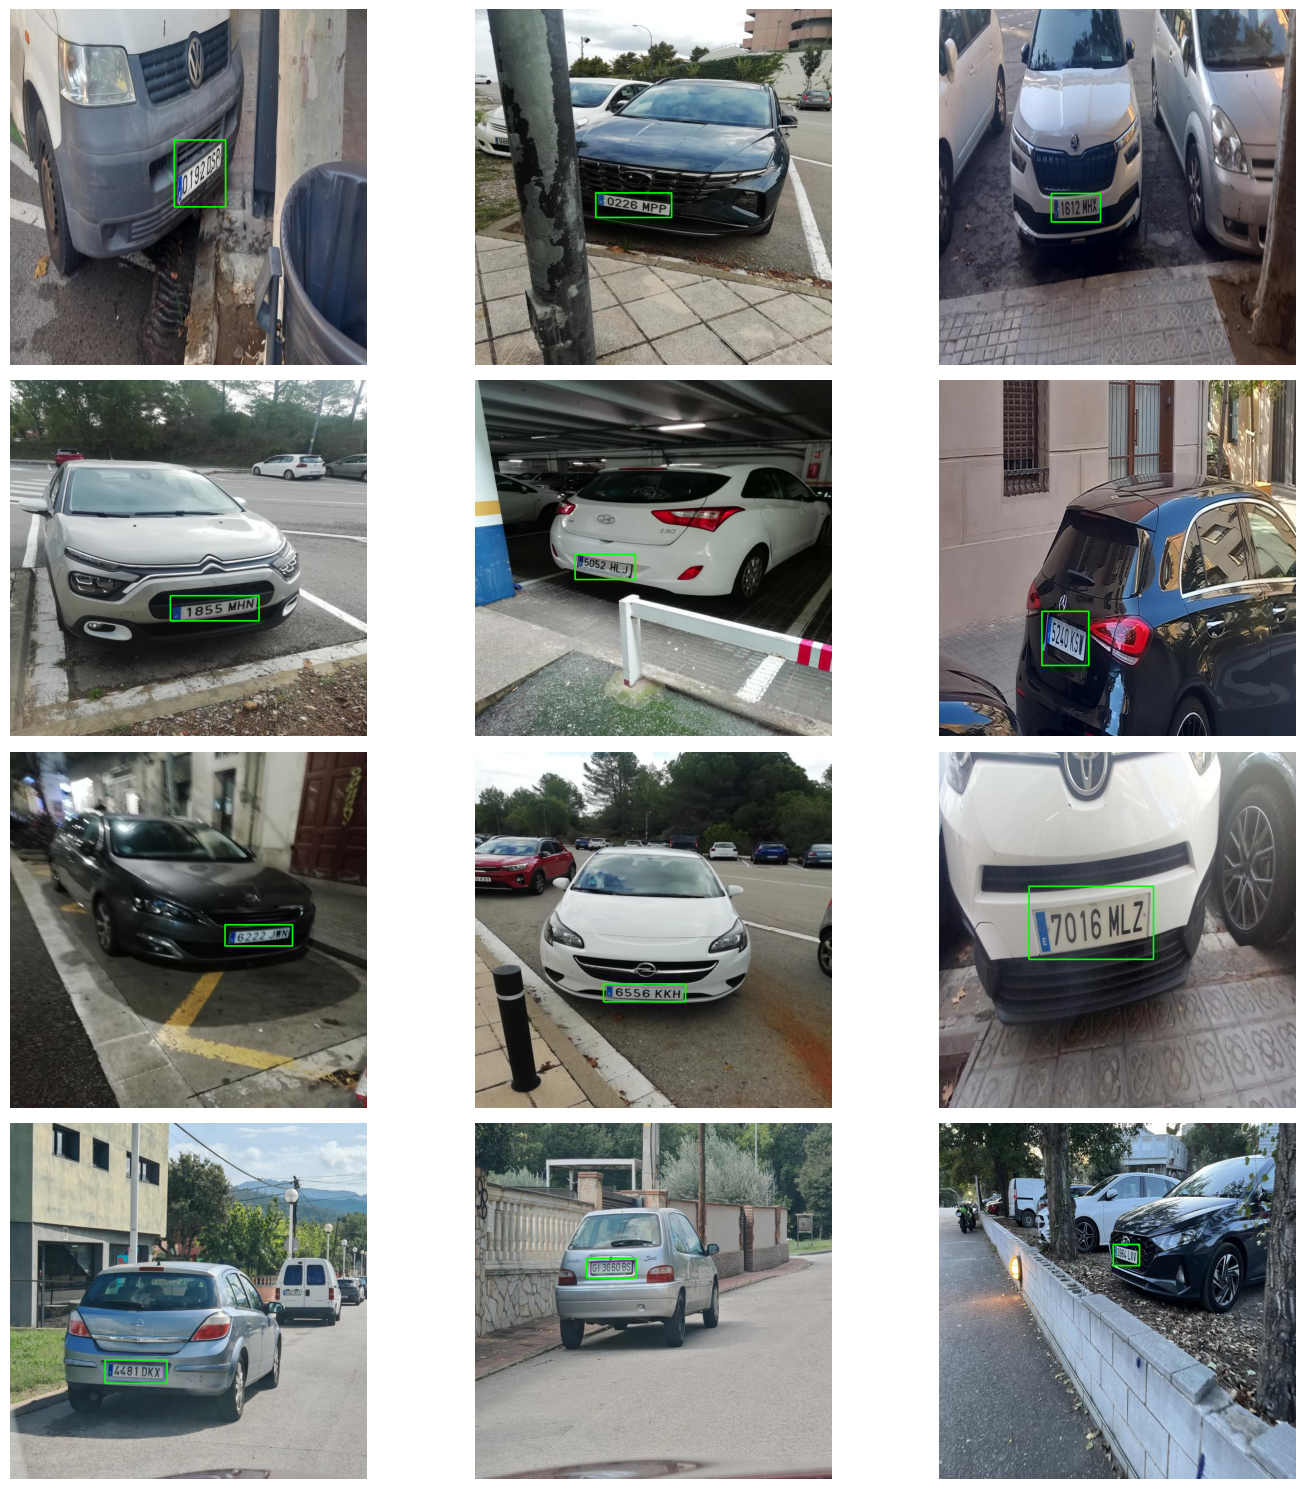

In [21]:
import cv2
import matplotlib.pyplot as plt
import math

# Determine the number of rows and columns for the subplot grid
num_images = len(results)
cols = 3  # Number of columns (adjust as needed)
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the images and display them in subplots
for idx, result in enumerate(results):
	result = result[0]
	img = result.orig_img
	box = result.boxes.xyxy[0].cpu().numpy().astype(int).tolist()
	if img is not None:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

		# Draw the bounding box on the image
		x1, y1, x2, y2 = box
		cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

		# Display the image in the subplot
		axes[idx].imshow(img)
		axes[idx].axis('off')  # Hide the axis
	else:
		print("Could not load image")

# Remove any unused subplots
for i in range(num_images, len(axes)):
	fig.delaxes(axes[i])

# Display the grid of images
plt.tight_layout()
plt.show()


In [3]:
from PIL import Image
import cv2

example_img = cv2.imread('../images/diverse/Copia de 1727095338102.jpg')
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
example_img = Image.fromarray(example_img)
lst = [example_img]*3
model = YOLO('../yolo11n_finetuned.pt')

In [4]:
results = model("../images/reduced", imgsz=640, verbose=False)

In [45]:
box = results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()
box

[1237, 1200, 2557, 1568]

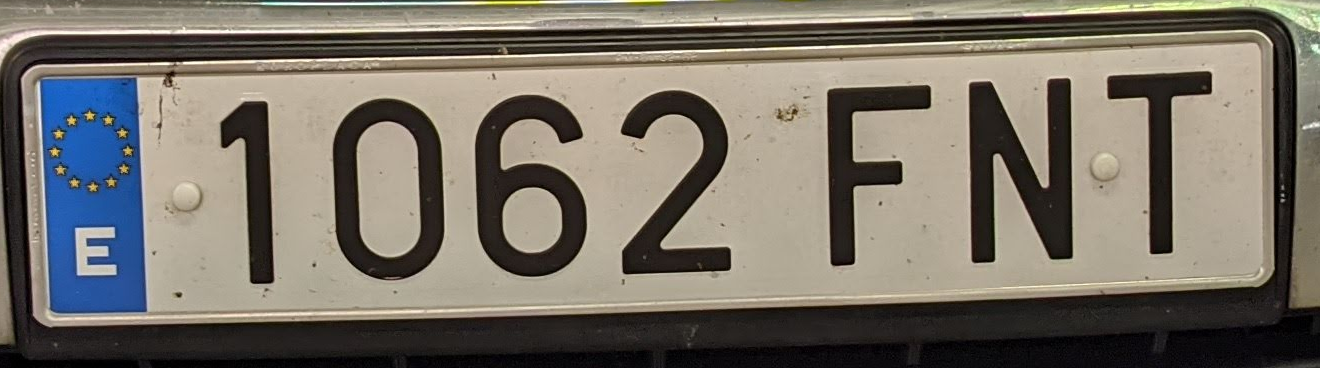

In [49]:
crop = Image.fromarray(results[0].orig_img[:,:,::-1]).crop(box)
crop

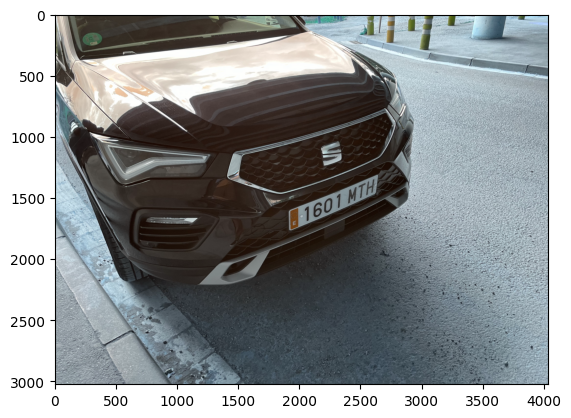

In [6]:
import matplotlib.pyplot as plt
plt.imshow(results[2].orig_img)